<a href="https://colab.research.google.com/github/jenniettrann/tailrisk/blob/main/spy_monte_carlo_simulation_of_future_target_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


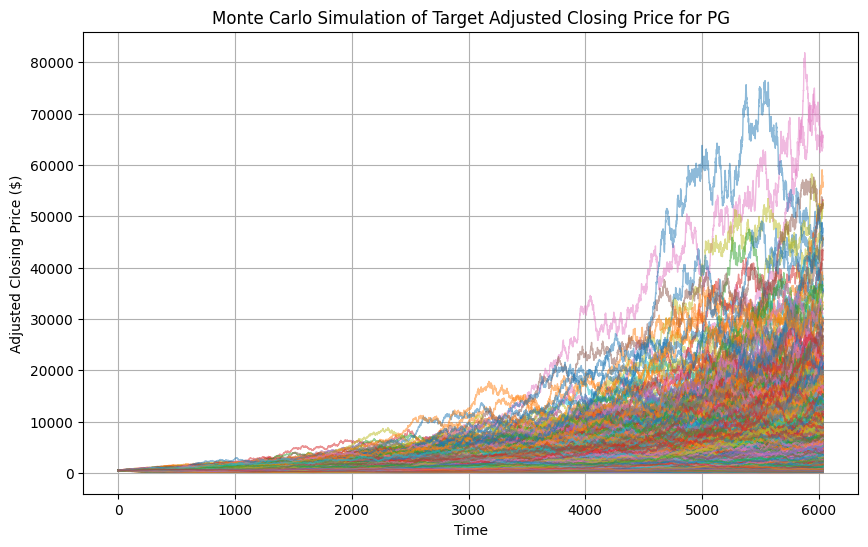

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Load the data
ticker = 'SPY'
start_date = '2000-01-01'
end_date = '2024-01-01'
df = yf.download(ticker, start=start_date, end=end_date)
returns = df['Adj Close'].pct_change().dropna()

# Parameters
T = len(returns)  # Time horizon
N = T  # Number of simulations
dt = 1  # Time step size
S0 = df['Adj Close'].iloc[-1]  # Initial value (latest adjusted closing price)

# Calculate drift and volatility
mu = returns.mean()
sigma = returns.std()

# Generate random normal increments
random_increments = np.random.normal(0, 1, size=(N, T)) * np.sqrt(dt)

# Generate target paths
target_paths = np.zeros((N, T+1))
target_paths[:, 0] = S0

for i in range(N):
    for j in range(T):
        drift = mu * target_paths[i, j]
        volatility = sigma * target_paths[i, j]
        target_paths[i, j+1] = target_paths[i, j] + drift * dt + volatility * random_increments[i, j]

# Plot the target paths
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.arange(T+1), target_paths[i], lw=1, alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Adjusted Closing Price ($)')
plt.title('Monte Carlo Simulation of Target Adjusted Closing Price for PG')
plt.grid(True)
plt.show()
